<h2 align="center">ACP Para los datos del Sloan Digital Survey</h2>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [3]:
url = 'https://raw.githubusercontent.com/joaramirezcu/Mineria_Proyecto/master/Skyserver_SQL2_27_2018%206_51_39%20PM.csv'
data_f1 = pd.read_csv(url, error_bad_lines=False)
data_f1=data_f1.drop(['rerun'], axis=1)
data_f1.head()

,objid,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [4]:
# Separamos los predictores (X) de la variable respuesta (y)
X = data_f1.loc[:, data_f1.columns != 'class']
y = data_f1['class']
print(type(X))
print(type(y))

print(X.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(10000, 16)
(10000,)


### Normalizando

Por lo general sucede que las variables en el dataset tengan distintos atributos medidos en otras unidades, en este caso se procede realizar un proceso de normalizacion para ponerlo en la misma escala, este es el caso del dataset  de las mediciones del *sloan digital sky survey*. Por tanto, aplicamos a los datos una transformación de normalización de forma que su media sea igual a 0, y su varianza=1. Para ello, usaremos la transformación *Standardscaler de sklearn.*

In [5]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
print(X_std)

[[ 0.          0.16745842 -0.58492272 ...  1.03148936  1.30931064
   0.66863177]
 [ 0.          0.16886159 -0.58311429 ... -0.63621258 -0.87919741
   0.91101156]
 [ 0.          0.17057433 -0.58347525 ... -0.65633905 -0.60919097
   0.77527888]
 ...
 [ 0.         -0.92039468  1.46090664 ...  3.26608697  2.69309363
   1.3036668 ]
 [ 0.         -0.92197294  1.46432109 ... -0.56688806 -0.70581092
  -0.60143828]
 [ 0.         -0.91804124  1.46639319 ... -0.56688806 -0.70581092
  -0.5820479 ]]


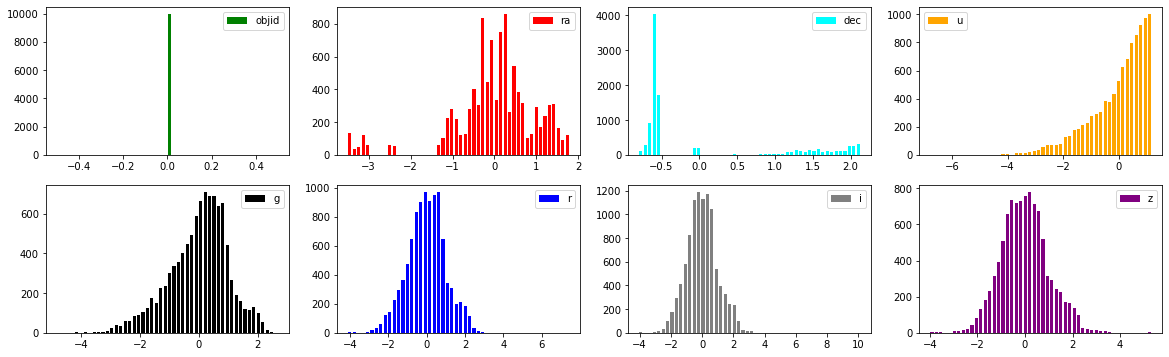

In [6]:
df1=pd.DataFrame(X_std) 

#Tabla 2*4
plt.figure(figsize=(20, 6))

plt.subplot(2, 4, 1)  # Tabla 2x4 y dibujaremos en la celda 1
hist, bins = np.histogram(df1[[0]], bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width,label="objid", color="green")
plt.legend()

plt.subplot(2, 4, 2)  # Tabla 2x4 y dibujaremos en la celda 2
hist, bins = np.histogram(df1[[1]], bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width, label="ra", color="red")
plt.legend()

plt.subplot(2, 4, 3)  # Tabla 2x4 y dibujaremos en la celda 3
hist, bins = np.histogram(df1[[2]], bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width, label="dec", color="cyan")
plt.legend()

plt.subplot(2, 4, 4)  # Tabla 2x4 y dibujaremos en la celda 4
hist, bins = np.histogram(df1[[3]], bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width,label="u", color="orange")
plt.legend()

plt.subplot(2, 4, 5)  # Tabla 2x4 y dibujaremos en la celda 5
hist, bins = np.histogram(df1[[4]], bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width, label="g", color="black")
plt.legend()

plt.subplot(2, 4, 6)  # Tabla 2x4 y dibujaremos en la celda 6
hist, bins = np.histogram(df1[[5]], bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width, label="r", color="blue")
plt.legend()

plt.subplot(2, 4, 7)  # Tabla 2x4 y dibujaremos en la celda 7
hist, bins = np.histogram(df1[[6]], bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width,label="i", color="gray")
plt.legend()

plt.subplot(2, 4, 8)  # Tabla 2x4 y dibujaremos en la celda 8
hist, bins = np.histogram(df1[[7]], bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width, label="z", color="purple")
plt.legend()

plt.show() 

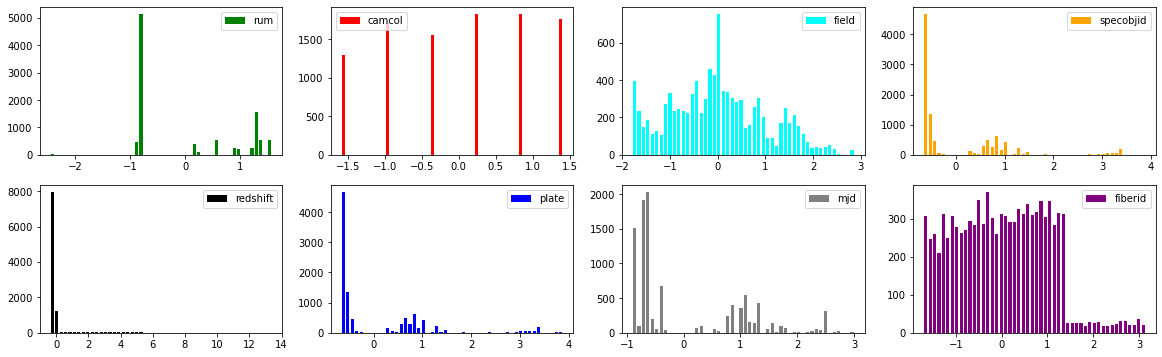

In [7]:
#Tabla 2*4
plt.figure(figsize=(20, 6))

plt.subplot(2, 4, 1)  # Tabla 2x4 y dibujaremos en la celda 1
hist, bins = np.histogram(df1[[8]], bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width,label="rum", color="green")
plt.legend()

plt.subplot(2, 4, 2)  # Tabla 2x4 y dibujaremos en la celda 2
hist, bins = np.histogram(df1[[9]], bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width, label="camcol", color="red")
plt.legend()

plt.subplot(2, 4, 3)  # Tabla 2x4 y dibujaremos en la celda 3
hist, bins = np.histogram(df1[[10]], bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width, label="field", color="cyan")
plt.legend()

plt.subplot(2, 4, 4)  # Tabla 2x4 y dibujaremos en la celda 4
hist, bins = np.histogram(df1[[11]], bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width,label="specobjid", color="orange")
plt.legend()

plt.subplot(2, 4, 5)  # Tabla 2x4 y dibujaremos en la celda 5
hist, bins = np.histogram(df1[[12]], bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width, label="redshift", color="black")
plt.legend()

plt.subplot(2, 4, 6)  # Tabla 2x4 y dibujaremos en la celda 6
hist, bins = np.histogram(df1[[13]], bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width, label="plate", color="blue")
plt.legend()

plt.subplot(2, 4, 7)  # Tabla 2x4 y dibujaremos en la celda 7
hist, bins = np.histogram(df1[[14]], bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width,label="mjd", color="gray")
plt.legend()

plt.subplot(2, 4, 8)  # Tabla 2x4 y dibujaremos en la celda 8
hist, bins = np.histogram(df1[[15]], bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width, label="fiberid", color="purple")
plt.legend()

plt.show() 

### Matrix de covarianza junto con valores y vectores propios

In [8]:
# Calculamos la matriz de covarianza

print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          1.00010001  0.00359641  0.03124068  0.04391302  0.04710761
   0.04573565  0.04295387 -0.09274983 -0.00629446  0.59475911 -0.09533664
   0.03031043 -0.09533887 -0.08689595  0.05749057]
 [ 0.          0.00359641  1.00010001  0.03528285  0.0618809   0.06341029
   0.05829772  0.05687599  0.77846273  0.1146254  -0.1314846   0.08835417
   0.06702746  0.08835037  0.06615325  0.15502788]
 [ 0.          0.03124068  0.03528285  1.00010001  0.84931696  0.6924482
   0.6026905   0.55153795  0.03823292  0.00994567  0.00854873 -0.12944222
   0.16375725 -0.12944339 -0.1688096   0.01130225]
 [ 0.          0.04391302  0.0618809   0.84931696  1.00010001  0.95820206
   0.90750945  0.87971015  0.05845214  0.01022407  0.01465257 -0.05498458
   0.40761706 -0.05498628 -0.09278083  0.047192

In [9]:
#Calculamos los autovalores y autovectores de la matriz y los mostramos

cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [-2.78159948e-02  1.10649814e-01  2.46001882e-01 -5.25743106e-01
  -4.23998021e-01  6.06748752e-02  1.12828617e-02 -3.02652705e-01
  -5.72008268e-01 -2.17504985e-01 -1.93006576e-02  5.25843487e-04
   7.11081076e-04 -1.80279816e-03  1.79566609e-08  0.00000000e+00]
 [-5.03633725e-02 -1.45854020e-01 -4.83398357e-01 -1.75893081e-01
  -4.73941913e-01  4.41143767e-02  5.42581650e-03  1.95660257e-01
   3.87781088e-01 -5.44304225e-01 -7.06734792e-03 -2.30562355e-03
  -1.36609238e-03  8.37094223e-05  3.50257605e-10  0.00000000e+00]
 [-3.50293435e-01  9.89733054e-02 -2.80024439e-02  3.26410409e-02
   5.65813030e-02  4.50285107e-01 -5.84047178e-01  3.23817364e-01
  -1.83048796e-01 -1.18886499e-02  1.10577661e-01 -3.421396

Considerando que se requiere reducir la dimensionalidad del dataset de tal forma que se pierda la menor información posible, descartaremos los autovectores cuyos autovalores sean más bajos, ya que son aquellos que menos información aportan al conjunto global. Para ello, lo que se hace es ordenarlos por parejas de autovector, autovalor.

In [10]:
#  Hacemos una lista de parejas (autovector, autovalor) 
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Ordenamos estas parejas den orden descendiente con la función sort
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visualizamos la lista de autovalores en orden desdenciente
print('Autovalores en orden descendiente:')
for i in eig_pairs:
    print(i[0])

Autovalores en orden descendiente:
4.601817648995267
3.1890518739859397
2.0370593782743813
1.5364228899104841
1.2461499729564516
0.8725997687492519
0.45948521631868955
0.4377679147454783
0.41683450330875454
0.12143783089488946
0.042024086197037944
0.01936038034780119
0.015676654706672094
0.005812030623555964
3.6167687630538036e-13
0.0


### Seleccionamos los los autovectores correspondientes a las componentes principales

El objetivo del Análsis de componentes principales es proyectar el dataset 4D en un espacio de menor dimensionalidad, con el fin de mejorar la eficiencia de cálculo y obtener la mayor información posible en el proceso. No obstante, la atención se centra en cuantas componentes seleccionar o dicho en otras palabras cual es el mejor espacio a proyectar 2D, 3D o unidimensional.

Anteriormente se ordenaron los valores propios como si fuese un proceso aislado,  por el contrario es resultado muy importante a tomar ya que tales valores propios es la medida de varianza de los datos. Ahora bien, para poder seleccionar la cantidad de componentes principales se hará uso de una métrica que se conoce como “varianza explicada”, el hecho de tener cuánta varianza se puede atribuir a cada una de estas componentes principales nos dará información necesaria para la seleccion de los componentes:

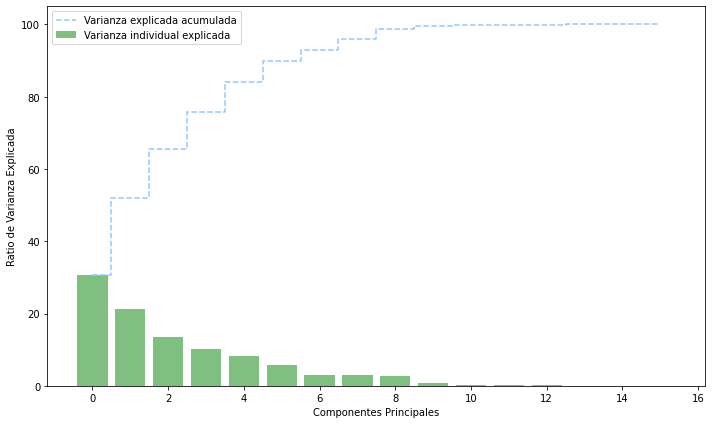

In [11]:
# A partir de los autovalores, calculamos la varianza explicada
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# Representamos en un diagrama de barras la varianza explicada por cada autovalor, y la acumulada
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(10, 6))

    plt.bar(range(16), var_exp, alpha=0.5, align='center',
            label='Varianza individual explicada', color='g')
    plt.step(range(16), cum_var_exp, where='mid', linestyle='--', label='Varianza explicada acumulada')
    plt.ylabel('Ratio de Varianza Explicada')
    plt.xlabel('Componentes Principales')
    plt.legend(loc='best')
    plt.tight_layout()

En la gráfica se aprecia claramente que la mayor parte de la varianza (con el 30.6%) corresponde a la primera componente. La segunda acumula algo más del 51% de la varianza, con la tercera componente se tiene una varianza acomulada de 65%. No obstante, con seis componentes se logra explicar el 89.9% de la varianza. Por tal motivo se consideran 6 componentes para realizar la proyección.

### Planos factoriales y ayudas para su interpretación

El plano factorial se construye buscando las coordenadas de los individuos sobre los ejes 1 - 6. El vector de todas las coordenadas sobre un eje s se nota $F_s$ luego:

$$F= XU$$

In [12]:
F = X_std @ eig_vecs
F.shape

(10000, 16)

In [13]:
dataframe=pd.DataFrame(F) 
print(dataframe[[0,1,2,3,4,5]])      #Muestra en DataFrame

             0         1         2         3         4         5
0     1.158585 -1.580231  1.059144 -0.212335  0.775249  0.801125
1     0.289570  1.140696  0.127755 -0.523261  1.132991  0.206340
2    -1.280438  1.160926  0.236499 -0.349019  1.137074  0.456198
3     1.558494 -1.864676  1.174055 -0.314323  0.680125 -0.226703
4     1.206669 -1.955424  1.248927 -0.299392  0.663665 -0.430612
...        ...       ...       ...       ...       ...       ...
9995 -0.234489  0.469865 -2.256738  0.954060 -0.747882  0.390167
9996 -0.192925  0.417180 -2.215993  0.976709 -0.833712 -0.116831
9997 -1.347611 -5.838278 -0.317535  0.534878 -0.628029  0.628946
9998 -1.228819  0.473153 -2.162387  1.053985 -0.760203  0.494649
9999  0.527136  0.603505 -2.375436  0.921840 -0.777015  0.470754

[10000 rows x 6 columns]


---

In [14]:
#Generamos la matríz a partir de los pares autovalor-autovector
matrix_w = np.hstack((eig_pairs[0][1].reshape(16,1),
                      eig_pairs[1][1].reshape(16,1),
                     eig_pairs[2][1].reshape(16,1),
                     eig_pairs[3][1].reshape(16,1),
                     eig_pairs[4][1].reshape(16,1),
                     eig_pairs[5][1].reshape(16,1)))

print('Matriz W:\n', matrix_w)

matr= X_std.dot(matrix_w)


Matriz W:
 [[ 0.          0.          0.          0.          0.          0.        ]
 [-0.02781599  0.11064981  0.24600188 -0.52574311 -0.42399802  0.06067488]
 [-0.05036337 -0.14585402 -0.48339836 -0.17589308 -0.47394191  0.04411438]
 [-0.35029343  0.09897331 -0.02800244  0.03264104  0.0565813   0.45028511]
 [-0.45490735  0.04886883  0.00196943  0.02947503  0.02739185  0.13938407]
 [-0.46045243  0.00197725  0.03037075  0.02818295  0.01109088  0.01801842]
 [-0.44930078 -0.02978793  0.05063387  0.02690137  0.00650999 -0.02515895]
 [-0.44139793 -0.05241061  0.06342576  0.03171055 -0.00111676 -0.04643742]
 [-0.04633861 -0.16860117 -0.57800049 -0.03734419 -0.33034142  0.03941116]
 [-0.0169253  -0.10007327 -0.21943933 -0.48860312  0.48893976  0.0117765 ]
 [-0.00630668  0.14820291  0.43287598 -0.42452128 -0.28546315  0.02012299]
 [-0.00819787 -0.53505497  0.18417932  0.03691706 -0.05137665  0.02451219]
 [-0.23208414  0.02231736 -0.02666531 -0.02701844 -0.04902968 -0.87460383]
 [-0.00819672 

In [18]:
dataframe2=pd.DataFrame(matr)   #primeras componentes
print(dataframe2)                     #muestra en forma de array"

             0         1         2         3         4         5
0     1.158585 -1.580231  1.059144 -0.212335  0.775249  0.801125
1     0.289570  1.140696  0.127755 -0.523261  1.132991  0.206340
2    -1.280438  1.160926  0.236499 -0.349019  1.137074  0.456198
3     1.558494 -1.864676  1.174055 -0.314323  0.680125 -0.226703
4     1.206669 -1.955424  1.248927 -0.299392  0.663665 -0.430612
...        ...       ...       ...       ...       ...       ...
9995 -0.234489  0.469865 -2.256738  0.954060 -0.747882  0.390167
9996 -0.192925  0.417180 -2.215993  0.976709 -0.833712 -0.116831
9997 -1.347611 -5.838278 -0.317535  0.534878 -0.628029  0.628946
9998 -1.228819  0.473153 -2.162387  1.053985 -0.760203  0.494649
9999  0.527136  0.603505 -2.375436  0.921840 -0.777015  0.470754

[10000 rows x 6 columns]


In [17]:
type(dataframe)

pandas.core.frame.DataFrame

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [34]:
url = 'https://raw.githubusercontent.com/joaramirezcu/Mineria_Proyecto/master/Skyserver_SQL2_27_2018%206_51_39%20PM.csv'
data_f1 = pd.read_csv(url, error_bad_lines=False)
data_f1=data_f1.drop(['rerun'], axis=1)

X = data_f1.iloc[:, [1,2,3,4,5,6,7,13]]
Y = data_f1.iloc[:, [12]]
Y = Y.replace({"GALAXY":0, "STAR":1,"QSO":2})
Y["class"].value_counts()

0    4998
1    4152
2     850
Name: class, dtype: int64

In [36]:
print(X.head())

           ra       dec         u         g         r         i         z  \
0  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342  15.22531   
1  183.598371  0.135285  18.66280  17.21449  16.67637  16.48922  16.39150   
2  183.680207  0.126185  19.38298  18.19169  17.47428  17.08732  16.80125   
3  183.870529  0.049911  17.76536  16.60272  16.16116  15.98233  15.90438   
4  183.883288  0.102557  17.55025  16.26342  16.43869  16.55492  16.61326   

   redshift  
0 -0.000009  
1 -0.000055  
2  0.123111  
3 -0.000111  
4  0.000590  


In [37]:
#normalizando 
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
print(X_std)

[[ 0.16745842 -0.58492272  1.03148637 ... -0.94605772 -0.99534154
  -0.36973112]
 [ 0.16886159 -0.58311429  0.05243046 ... -0.08264457 -0.02604308
  -0.36984929]
 [ 0.17057433 -0.58347525  0.92156796 ...  0.44120145  0.31452753
  -0.05302706]
 ...
 [-0.92039468  1.46090664  0.16753826 ...  0.74398287  0.82921097
  -0.37074104]
 [-0.92197294  1.46432109  0.31801835 ...  0.6825157   0.59598555
  -0.33364691]
 [-0.91804124  1.46639319  0.79229193 ... -0.65522289 -0.76214106
  -0.06510125]]


In [38]:
# Calculamos la matriz de covarianza

print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[1.00010001 0.00359641 0.03124068 0.04391302 0.04710761 0.04573565
  0.04295387 0.03031043]
 [0.00359641 1.00010001 0.03528285 0.0618809  0.06341029 0.05829772
  0.05687599 0.06702746]
 [0.03124068 0.03528285 1.00010001 0.84931696 0.6924482  0.6026905
  0.55153795 0.16375725]
 [0.04391302 0.0618809  0.84931696 1.00010001 0.95820206 0.90750945
  0.87971015 0.40761706]
 [0.04710761 0.06341029 0.6924482  0.95820206 1.00010001 0.97776955
  0.96929364 0.44112386]
 [0.04573565 0.05829772 0.6026905  0.90750945 0.97776955 1.00010001
  0.98160477 0.4314931 ]
 [0.04295387 0.05687599 0.55153795 0.87971015 0.96929364 0.98160477
  1.00010001 0.42407658]
 [0.03031043 0.06702746 0.16375725 0.40761706 0.44112386 0.4314931
  0.42407658 1.00010001]]


In [39]:
#Calculamos los autovalores y autovectores de la matriz y los mostramos

cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [40]:
#  Hacemos una lista de parejas (autovector, autovalor) 
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Ordenamos estas parejas den orden descendiente con la función sort
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visualizamos la lista de autovalores en orden desdenciente
print('Autovalores en orden descendiente:')
for i in eig_pairs:
    print(i[0])

Autovalores en orden descendiente:
4.587686687994357
1.006002629479969
0.9973048273150398
0.8674391730323167
0.49840275439842785
0.021615843522047214
0.016494148487470852
0.0058540157783755825


array([ 57.34034899,  69.91412436,  82.37918807,  93.22109343,
        99.45050486,  99.72067588,  99.92683212, 100.        ])

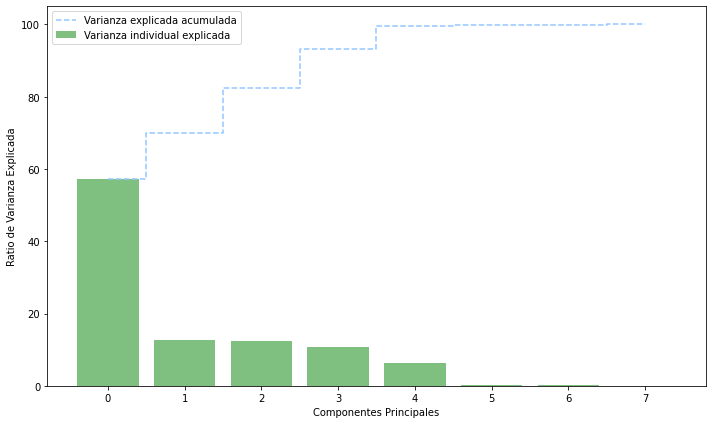

In [45]:
# A partir de los autovalores, calculamos la varianza explicada
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# Representamos en un diagrama de barras la varianza explicada por cada autovalor, y la acumulada
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(10, 6))

    plt.bar(range(len(eig_vals)), var_exp, alpha=0.5, align='center',
            label='Varianza individual explicada', color='g')
    plt.step(range(len(eig_vals)), cum_var_exp, where='mid', linestyle='--', label='Varianza explicada acumulada')
    plt.ylabel('Ratio de Varianza Explicada')
    plt.xlabel('Componentes Principales')
    plt.legend(loc='best')
    plt.tight_layout()
    
cum_var_exp

[62.61959504007534, 14.24858118973115, 14.223592439141935]

array([ 62.61959504,  76.86817623,  91.09176867,  99.31857455,
        99.67844898,  99.91559109, 100.        ])